# Setup

In [1]:
!pip install -q -U diffusers transformers accelerate imageio-ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

To nazwy pakietów, które mają zostać zainstalowane:
   - diffusers: Biblioteka do generowania obrazów za pomocą modeli dyfuzyjnych.
   - transformers: Biblioteka zawierająca różne modele uczenia maszynowego, szczególnie do przetwarzania języka naturalnego.
   - accelerate: Narzędzie do łatwiejszego trenowania modeli na różnych urządzeniach (CPU, GPU).
   - imageio-ffmpeg: Biblioteka do odczytu i zapisu plików wideo.

In [ ]:
import torch

from diffusers import StableVideoDiffusionPipeline, I2VGenXLPipeline
from diffusers.utils import load_image, export_to_video, export_to_gif
from IPython.display import Video, display

1. Importuje bibliotekę PyTorch, która jest powszechnie używana do obliczeń tensorowych i tworzenia sieci neuronowych.

2. Importuje dwa konkretne modele z biblioteki diffusers:
   - StableVideoDiffusionPipeline: służy do generowania stabilnych sekwencji wideo.
   - I2VGenXLPipeline: model do generowania wideo na podstawie obrazów (Image to Video).

3. Importuje trzy użyteczne funkcje z modułu utils biblioteki diffusers:
   - load_image: do wczytywania obrazów.
   - export_to_video: do eksportowania wyników jako plik wideo.
   - export_to_gif: do eksportowania wyników jako animowany GIF.

4. Importuje funkcje z IPython.display, które są używane do wyświetlania różnych typów mediów w środowiskach interaktywnych, takich jak Jupyter Notebook:
   - Video: do wyświetlania plików wideo.
   - display: ogólna funkcja do wyświetlania różnych typów danych.

In [3]:
class CFG:
    model = "stabilityai/stable-video-diffusion-img2vid-xt"
    dtype = torch.float16
    seed = 1942
    guidance = 8
    infsteps = 50

1. `model = "stabilityai/stable-video-diffusion-img2vid-xt"`
   Określa nazwę lub ścieżkę do modelu, który będzie używany. W tym przypadku jest to model "stable-video-diffusion-img2vid-xt" od Stability AI, służący do przekształcania obrazów w wideo.

2. `dtype = torch.float16`
   Ustawia typ danych na float16, co oznacza połowiczną precyzję (16-bitowe liczby zmiennoprzecinkowe). Jest to często stosowane w celu zmniejszenia zużycia pamięci i przyspieszenia obliczeń, szczególnie na GPU.

3. `seed = 1942`
   Ustala ziarno (seed) dla generatora liczb losowych. Użycie stałej wartości ziarna zapewnia powtarzalność wyników - przy tych samych danych wejściowych i tym samym ziarnie, wyniki powinny być identyczne.

4. `guidance = 8`
   Określa siłę guidance scale. W kontekście modeli dyfuzyjnych, wyższa wartość tego parametru zwykle prowadzi do silniejszego wpływu warunku początkowego (np. obrazu wejściowego) na generowany wynik.

5. `infsteps = 50`
    oznacza liczbę kroków inferencji (inference steps). W modelach dyfuzyjnych, większa liczba kroków prowadzi do lepszej jakości wyników, ale też wydłuża czas generowania.

# SVD

In [4]:

pipe = StableVideoDiffusionPipeline.from_pretrained(
    CFG.model, torch_dtype = CFG.dtype, variant="fp16")

pipe.enable_model_cpu_offload()

generator = torch.manual_seed(CFG.seed)

model_index.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

vae%2Fconfig.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

image_encoder%2Fconfig.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/984 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Ten fragment kodu inicjalizuje i konfiguruje model do generowania wideo. Oto szczegółowe wyjaśnienie:

1. `pipe = StableVideoDiffusionPipeline.from_pretrained(...)`
   Tworzy instancję modelu StableVideoDiffusionPipeline, ładując go z wcześniej wytrenowanych wag.

   - `CFG.model`: Używa nazwy modelu zdefiniowanej w klasie CFG.
   - `torch_dtype = CFG.dtype`: Ustawia typ danych na float16, zgodnie z konfiguracją.
   - `variant="fp16"`: Określa, że ma być używana 16-bitowa wersja modelu, co jest spójne z typem danych float16.

2. `pipe.enable_model_cpu_offload()`
   Włącza funkcję offloadingu modelu na CPU. Oznacza to, że części modelu, które nie są aktualnie używane, mogą być przechowywane w pamięci RAM komputera, a nie w pamięci GPU. To pozwala na efektywniejsze zarządzanie pamięcią, szczególnie przy dużych modelach.

3. `generator = torch.manual_seed(CFG.seed)`
   Inicjalizuje generator liczb pseudolosowych PyTorch z ziarnem zdefiniowanym w CFG.seed.

   - Użycie stałego ziarna zapewnia powtarzalność wyników - przy każdym uruchomieniu kodu z tym samym ziarnem, generowane sekwencje losowe będą identyczne.
   - Jest to ważne dla debugowania i zapewnienia spójności wyników.

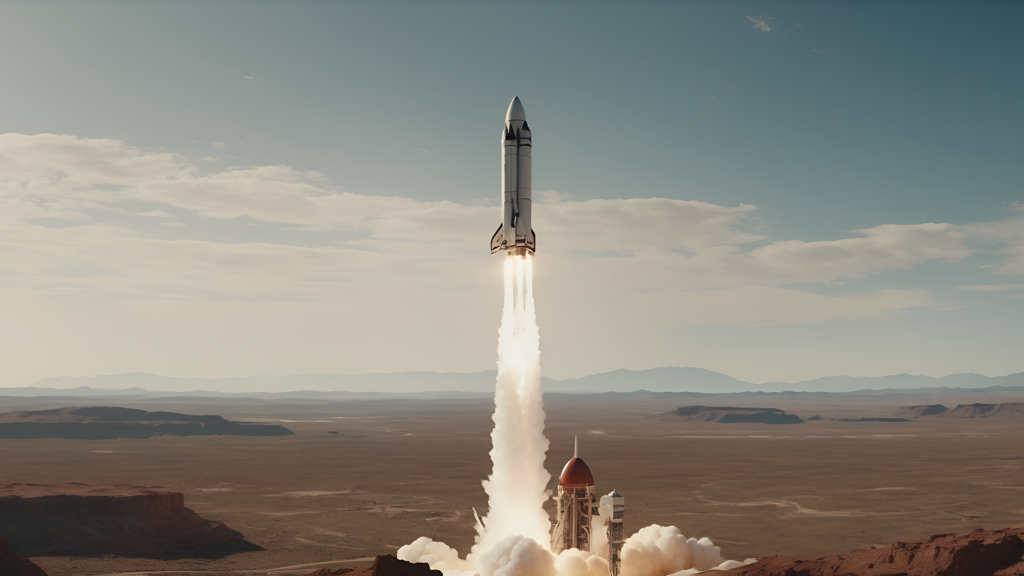

In [5]:

image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/svd/rocket.png")
image

In [ ]:
frames = pipe(image, num_inference_steps = CFG.infsteps, generator=generator,
              decode_chunk_size=8, motion_bucket_id=180,  noise_aug_strength=0.1).frames[0]
export_to_video(frames, "generated0.mp4", fps=7)
export_to_gif(frames, "generated0.gif")

  0%|          | 0/50 [00:00<?, ?it/s]

'generated0.gif'

Ten fragment kodu generuje sekwencję wideo na podstawie wczytanego wcześniej obrazu, a następnie eksportuje wynik do plików wideo i GIF. Oto szczegółowe wyjaśnienie:

1. `frames = pipe(...)`
   Wywołuje model (pipe) do generowania sekwencji klatek wideo:

   - `image`: Wejściowy obraz (rakieta).
   - `num_inference_steps = CFG.infsteps`: Liczba kroków inferencji (3, zgodnie z CFG).
   - `generator`: Użycie wcześniej zainicjalizowanego generatora z ustalonym ziarnem.
   - `decode_chunk_size=8`: Określa ilość klatek przetwarzanych jednocześnie.
   - `motion_bucket_id=180`: Parametr kontrolujący intensywność ruchu w wygenerowanym wideo.
   - `noise_aug_strength=0.1`: Siła dodawanego szumu, wpływająca na różnorodność generowanych klatek.

   Wynik jest przypisany do zmiennej `frames`, która zawiera sekwencję wygenerowanych klatek.

2. `export_to_video(frames, "generated0.mp4", fps=7)`
   Eksportuje wygenerowane klatki do pliku wideo:

   - `frames`: Sekwencja wygenerowanych klatek.
   - `"generated0.mp4"`: Nazwa pliku wyjściowego.
   - `fps=7`: Ustawia liczbę klatek na sekundę w wygenerowanym wideo.

3. `export_to_gif(frames, "generated0.gif")`
   Eksportuje te same klatki do animowanego GIF-a:

   - `frames`: Ta sama sekwencja klatek.
   - `"generated0.gif"`: Nazwa pliku GIF.

In [7]:
display(Video("generated0.mp4", embed=True))

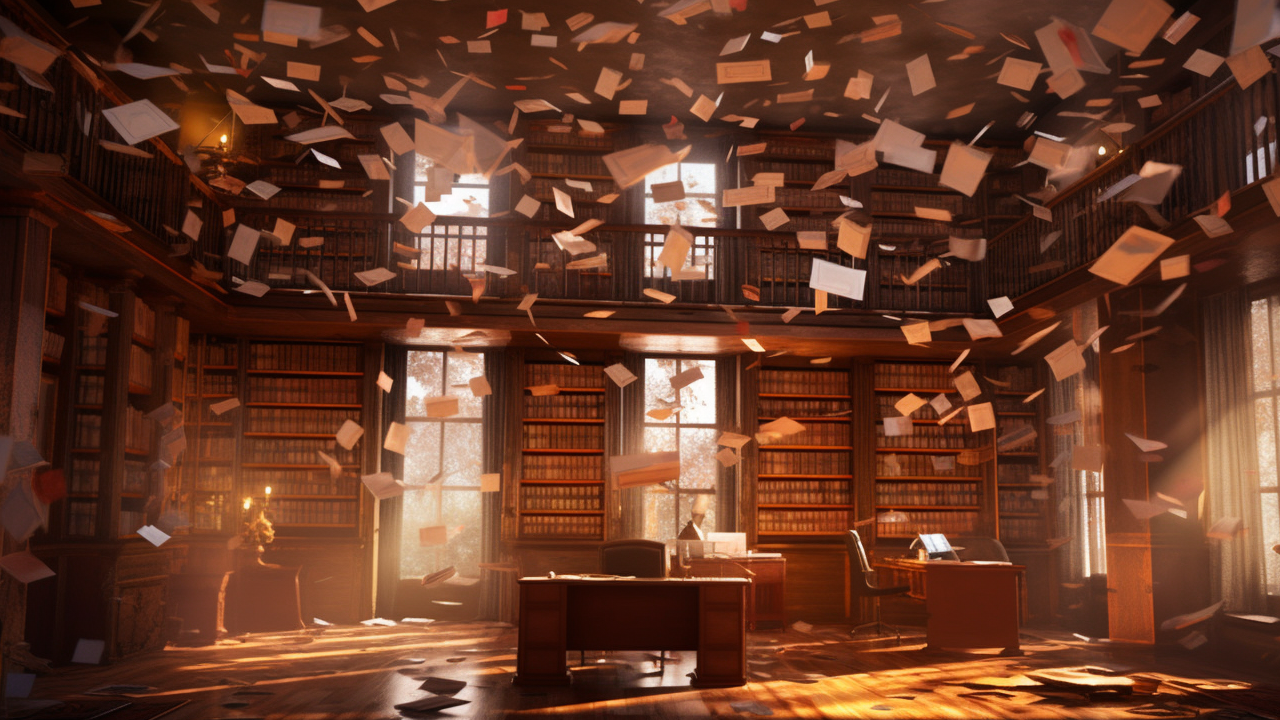

In [8]:
# for comparison with I2V
image_url = "https://huggingface.co/datasets/diffusers/docs-images/resolve/main/i2vgen_xl_images/img_0009.png"
image = load_image(image_url).convert("RGB")
image

In [ ]:
frames = pipe(image, num_inference_steps = CFG.infsteps, generator=generator,
              decode_chunk_size=8, motion_bucket_id=180,  noise_aug_strength=0.1).frames[0]
export_to_video(frames, "generated1a.mp4", fps=7)
export_to_gif(frames, "generated1a.gif")

  0%|          | 0/50 [00:00<?, ?it/s]

'generated1a.gif'

In [10]:
display(Video("generated1a.mp4", embed=True))

In [11]:
del pipe

# I2V

In [12]:
pipe2 = I2VGenXLPipeline.from_pretrained("ali-vilab/i2vgen-xl",
                            torch_dtype=torch.float16, variant="fp16")
pipe2.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

image_encoder%2Fconfig.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/706M [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/637 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Ten kod inicjalizuje nowy model do generowania wideo, tym razem używając I2VGenXLPipeline.  

1. `pipe2 = I2VGenXLPipeline.from_pretrained("ali-vilab/i2vgen-xl", ...)`
   Tworzy instancję modelu I2VGenXLPipeline, ładując go z wcześniej wytrenowanych wag.

   - `"ali-vilab/i2vgen-xl"`: Nazwa modelu, który jest ładowany. Jest to model I2VGenXL stworzony przez laboratorium Ali-VILAB.
   - `torch_dtype=torch.float16`: Ustawia typ danych na float16, co pozwala na oszczędność pamięci i potencjalnie szybsze obliczenia.
   - `variant="fp16"`: Określa, że ma być używana 16-bitowa wersja modelu, co jest spójne z typem danych float16.

2. `pipe2.enable_model_cpu_offload()`
   Włącza funkcję offloadingu modelu na CPU.

   - Ta funkcja pozwala na efektywniejsze zarządzanie pamięcią GPU.
   - Części modelu, które nie są aktualnie używane, mogą być przechowywane w pamięci RAM komputera, a nie w pamięci GPU.
   - Jest to szczególnie przydatne przy pracy z dużymi modelami na urządzeniach z ograniczoną pamięcią GPU.

In [13]:

image_url = "https://huggingface.co/datasets/diffusers/docs-images/resolve/main/i2vgen_xl_images/img_0009.png"
image = load_image(image_url).convert("RGB")

In [ ]:
prompt = "Papers were floating in the air on a table in the library"
negative_prompt = "Distorted, discontinuous, Ugly, blurry, low resolution, motionless, static, disfigured, disconnected limbs, Ugly faces, incomplete arms"
generator = torch.manual_seed(CFG.seed)

Ten fragment kodu przygotowuje parametry dla generowania wideo z użyciem modelu I2VGenXLPipeline.

1. `prompt = "Papers were floating in the air on a table in the library"`
   Definiuje pozytywny prompt, czyli tekstowy opis tego, co powinno pojawić się w wygenerowanym wideo.  

2. `negative_prompt = "Distorted, discontinuous, Ugly, blurry, low resolution, motionless, static, disfigured, disconnected limbs, Ugly faces, incomplete arms"`
   Określa negatywny prompt, czyli listę cech, których model powinien unikać podczas generowania wideo. Ten negatywny prompt zawiera wiele elementów, które mogłyby obniżyć jakość lub realizmwygenerowanego wideo, takich jak zniekształcenia, nieciągłości, brzydota, rozmycie, niska rozdzielczość, brak ruchu, zniekształcone kończyny czy niekompletne ramiona.

3. `generator = torch.manual_seed(CFG.seed)`
   Inicjalizuje generator liczb pseudolosowych PyTorch, używając ziarna (seed) zdefiniowanego wcześniej w klasie CFG.
   - Użycie stałego ziarna zapewnia powtarzalność wyników - przy każdym uruchomieniu kodu z tym samym ziarnem, generowane sekwencje losowe będą identyczne.
   - `CFG.seed` odwołuje się do wartości zdefiniowanej wcześniej w klasie konfiguracyjnej (prawdopodobnie 1942).

Te parametry są kluczowe dla procesu generowania wideo:

- Prompt pozytywny kieruje modelem, określając, co powinno być widoczne w wideo.
- Prompt negatywny pomaga uniknąć niepożądanych elementów i poprawia ogólną jakość generowanego wideo.
- Ustawienie ziarna generatora losowego zapewnia powtarzalność wyników, co jest przydatne do debugowania i porównywania różnych ustawień generowania.

In [15]:
frames = pipe2(
    prompt=prompt,
    image=image, num_inference_steps = CFG.infsteps, negative_prompt=negative_prompt,
    guidance_scale= CFG.guidance, generator=generator).frames[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Ten kod wywołuje model I2VGenXLPipeline do generowania sekwencji wideo. Oto szczegółowe wyjaśnienie:

1. `frames = pipe2(...)`
   Wywołuje model (pipe2) do generowania sekwencji klatek wideo. Argumenty przekazane do modelu to:

   - `prompt=prompt`: Używa wcześniej zdefiniowanego pozytywnego prompta, który opisuje pożądaną zawartość wideo

   - `image=image`: Przekazuje wczytany wcześniej obraz jako punkt wyjścia dla generowania wideo.

   - `num_inference_steps = CFG.infsteps`: Określa liczbę kroków inferencji. Wartość ta pochodzi z wcześniej zdefiniowanej konfiguracji (CFG.infsteps ).

   - `negative_prompt=negative_prompt`: Używa wcześniej zdefiniowanego negatywnego prompta, który określa cechy, których należy unikać w generowanym wideo.

   - `guidance_scale= CFG.guidance`: Ustawia skalę guidance, która kontroluje, jak mocno model powinien trzymać się podanego prompta. Wartość pochodzi z konfiguracji (CFG.guidance).

   - `generator=generator`: Przekazuje wcześniej zainicjalizowany generator liczb pseudolosowych, co zapewnia powtarzalność wyników.

2. `.frames[0]`: Wybiera pierwszą  sekwencję klatek z wygenerowanego wyniku.

Wynikiem tego wywołania jest zmienna `frames`, która zawiera sekwencję wygenerowanych klatek wideo. Model I2VGenXLPipeline użył podanego obrazu jako punktu wyjścia i, kierując się pozytywnym i negatywnym promptem, wygenerował sekwencję klatek pokazującą prawdopodobnie unoszące się w powietrzu kartki papieru nad stołem w bibliotece.

Ten proces generowania łączy w sobie:
- Wizualną informację z wejściowego obrazu
- Tekstowy opis pożądanej sceny (prompt)
- Wskazówki, czego unikać (negatywny prompt)
- Kontrolę nad procesem generowania (liczba kroków inferencji, skala guidance)

Wygenerowane klatki będą podstawą do stworzenia finalnego wideo, które powinno odzwierciedlać zadany prompt, jednocześnie unikając cech opisanych w negatywnym prompcie.

In [16]:
export_to_video(frames, "generated1b.mp4", fps=7)
export_to_gif(frames, "generated1b.gif")

'generated1b.gif'

Ten fragment kodu eksportuje wygenerowane wcześniej klatki do formatu wideo i GIF. Oto szczegółowe wyjaśnienie każdej linii:

1. `export_to_video(frames, "generated1b.mp4", fps=7)`
   Ta funkcja eksportuje sekwencję klatek do pliku wideo:
   - `frames`: Sekwencja klatek wygenerowana przez model I2VGenXLPipeline.
   - `"generated1b.mp4"`: Nazwa pliku wyjściowego w formacie MP4.
   - `fps=7`: Ustawia liczbę klatek na sekundę (frames per second) w wygenerowanym wideo na 7.

2. `export_to_gif(frames, "generated1b.gif")`
   Ta funkcja eksportuje te same klatki do animowanego pliku GIF:
   - `frames`: Ta sama sekwencja klatek co w przypadku wideo.
   - `"generated1b.gif"`: Nazwa pliku wyjściowego w formacie GIF.

Warto zauważyć:
- Eksport do obu formatów (MP4 i GIF) pozwala na elastyczność w prezentacji i udostępnianiu wyników:
  - Format MP4 zazwyczaj zapewnia lepszą jakość i mniejszy rozmiar pliku.
  - Format GIF jest szeroko obsługiwany i łatwy do osadzenia na stronach internetowych czy w prezentacjach.
- Ustawienie 7 klatek na sekundę (fps) daje płynną animację, jednocześnie utrzymując rozmiar pliku w rozsądnych granicach.

Po wykonaniu tego kodu, w katalogu roboczym pojawią się dwa nowe pliki:
1. "generated1b.mp4" - wideo pokazujące wygenerowaną animację.
2. "generated1b.gif" - animowany GIF przedstawiający tę samą sekwencję.


In [17]:
display(Video("generated1b.mp4", embed=True))